# Random Forest Project

For this project I will be exploring publicly available data from [LendingClub.com](www.lendingclub.com). Lending Club connects people who need money (borrowers) with people who have money (investors). Hopefully, as an investor you would want to invest in people who showed a profile of having a high probability of paying you back. I will try to create a model that will help predict this.

Lending club had a [very interesting year in 2016](https://en.wikipedia.org/wiki/Lending_Club#2016), so let's check out some of their data and keep the context in mind. This data is from before they even went public.

I will use lending data from 2007-2010 and be trying to classify and predict whether or not the borrower paid back their loan in full.

Here are what the columns represent:
* credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
* purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
* int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
* installment: The monthly installments owed by the borrower if the loan is funded.
* log.annual.inc: The natural log of the self-reported annual income of the borrower.
* dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
* fico: The FICO credit score of the borrower.
* days.with.cr.line: The number of days the borrower has had a credit line.
* revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
* revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
* inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
* delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
* pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

## Set up

Import the required libraries

In [121]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Load the data

In [122]:
df = pd.read_csv('loan_data.csv')
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


Check if we need to worry about Null values

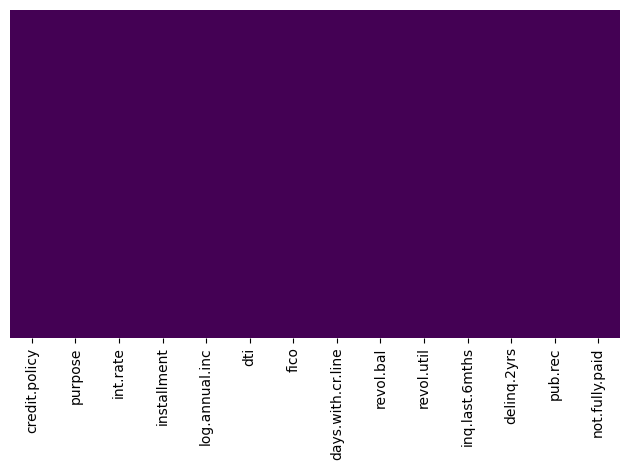

In [124]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis') # there are no NA values
plt.tight_layout()

In [125]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


## Exploratory data analysis

First, I will create a histogram of two FICO distributions on top of each other, one for each credit.policy outcome

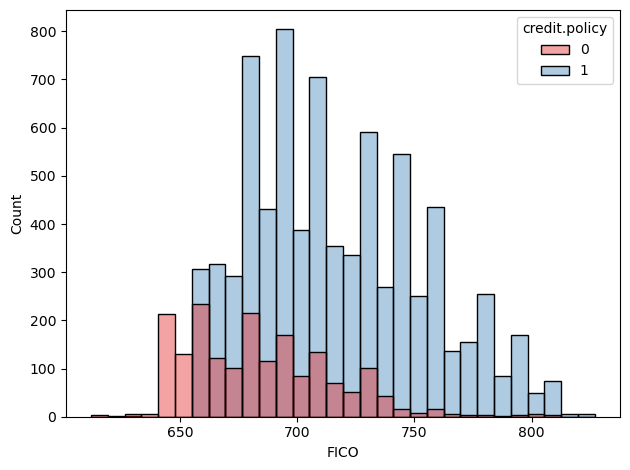

In [126]:
sns.histplot(x = 'fico', 
             hue = 'credit.policy', 
             data = df,
            multiple = 'layer',
            alpha = 0.4, bins = 30,
            palette = 'Set1')
plt.xlabel('FICO')
plt.tight_layout()

The histogram shows that most borrowers meet the credit underwriting criteria (credit.policy = 1) and cluster around a FICO score of approximately 700. In contrast, those who do not meet the policy (credit.policy = 0) generally have lower FICO scores and appear in much smaller numbers. This pattern indicates that LendingClub’s credit policy effectively filters out lower-score, higher-risk applicants (FIFO score below 660), resulting in a majority of approved borrowers having relatively good credit ratings.

Next, I will explore FICO across whether the loan was fully paid

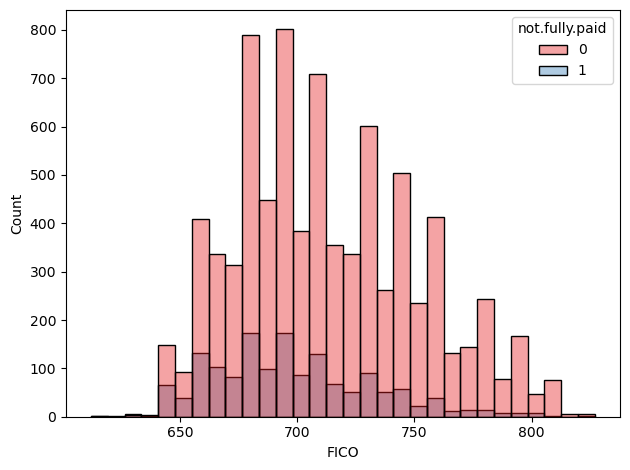

In [127]:
sns.histplot(x = 'fico', 
             hue = 'not.fully.paid', 
             data = df,
            multiple = 'layer',
            alpha = 0.4, bins = 30,
            palette = 'Set1')
plt.xlabel('FICO')
plt.tight_layout()

The plot shows that a large majority of customers did not fully pay their loans, as indicated by the taller bars for not.fully.paid = 1. However, the FICO score distributions of both groups overlap substantially, suggesting that FICO alone does not strongly separate repaid from defaulted loans. In other words, while low FICO scores are slightly more common among non-payers, additional factors beyond credit score likely influence loan repayment outcomes.

Then, I will explore the number of loans by purpose, segregated across wehther the loan was fully paid

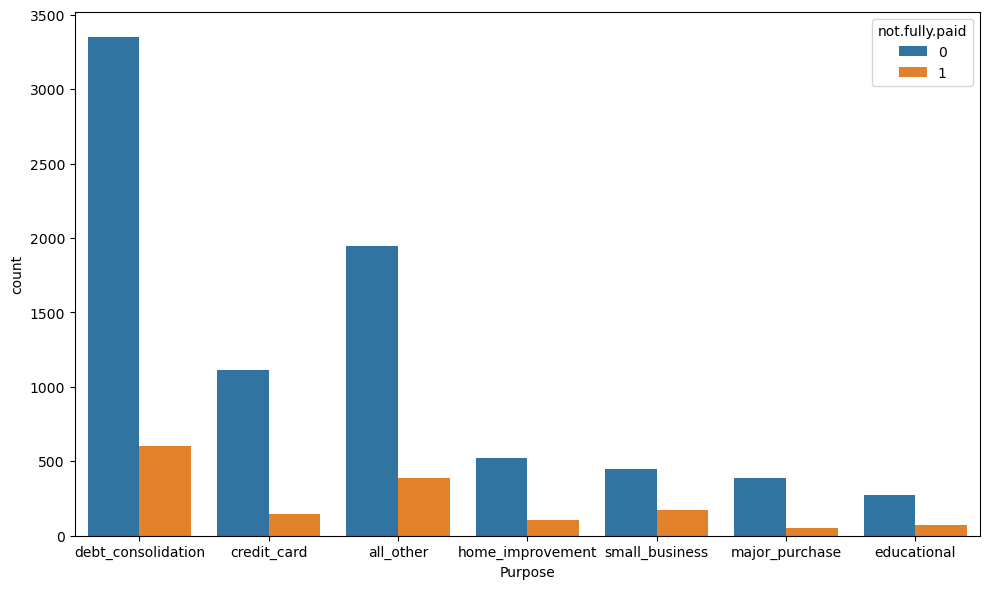

In [128]:
plt.figure(figsize= (10,6))
sns.countplot(x = 'purpose', 
             hue = 'not.fully.paid', 
             data = df)
plt.xlabel('Purpose')
plt.tight_layout()

Most LendingClub loans are issued for debt consolidation, and while many of these are repaid, this category also accounts for the highest number of defaults simply due to its volume. However, the ratio between fully and not fully paid across the purposes seems to be relatively similar. This means that whether a customer pays their loan in full might not be related to the reason they are asking the loan for.

Now, I would like to explore the trend between FICO and interest rate

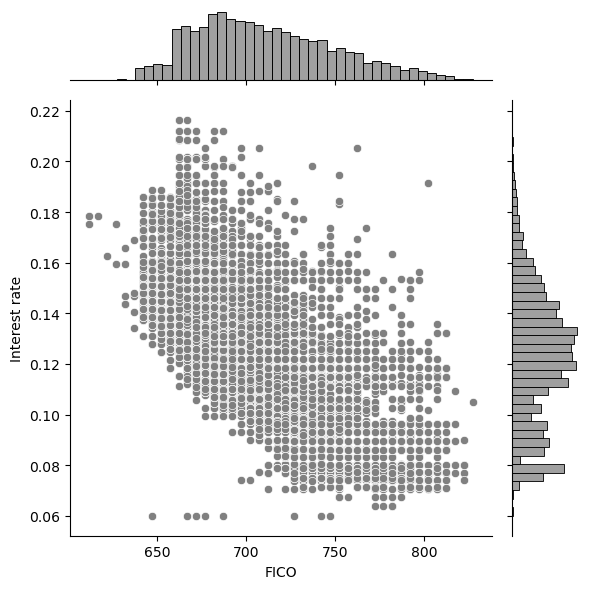

In [129]:
sns.jointplot(x = 'fico', 
              y = 'int.rate',
             data = df,
             color = 'grey')
plt.xlabel('FICO')
plt.ylabel('Interest rate')
plt.tight_layout()

There is a clear inverse relationship between FICO and interest rate: borrowers with higher credit scores receive more favorable loan terms. The lender’s pricing model strongly reflects creditworthiness, with a steep rate penalty for low FICO borrowers and tighter, lower-rate clustering among high-credit individuals.

Let's explore this a bit further by checking potential linear relationships across credit policy and across whether the loan was fully paid

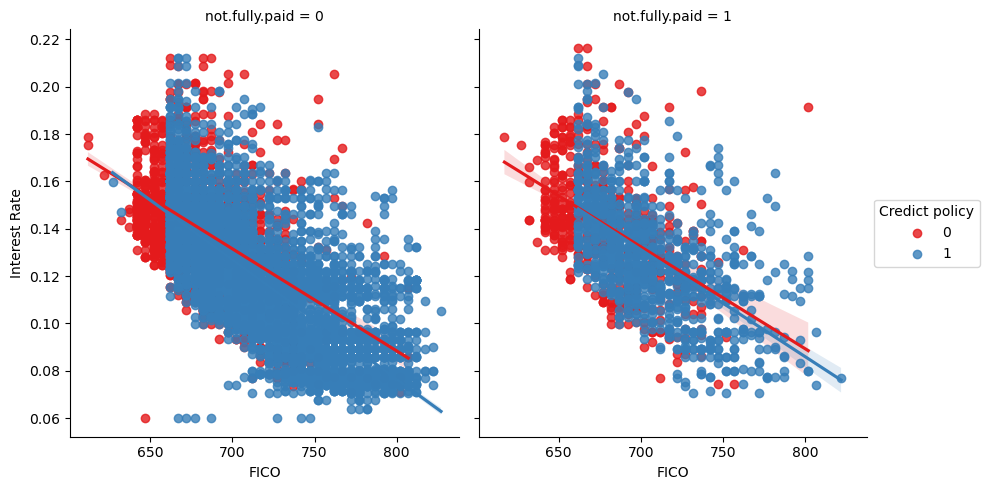

In [130]:
g = sns.lmplot(x = 'fico', 
           y ='int.rate',
           data = df,
           col = 'not.fully.paid', # col here is column, not colour
           hue = 'credit.policy',
           legend=False,
            palette = 'Set1')

g.set_axis_labels("FICO", "Interest Rate")

plt.xlabel('FICO')
plt.ylabel('Interest rate')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title = "Credict policy")
plt.tight_layout()

Some interesting aspects are that credit policy 0 clusters towards low values of FICO (lower than ~ 700) while policy 1 has a more spread representation but only above a FICO of 660-670. Thus, this could suggest that borrowers who fail to meet the lender’s credit policy tend to have lower FICO scores, pay higher interest rates, and are overrepresented among loans that were not fully repaid. The lender’s policy appears to discriminate risk reasonably well, since policy-compliant borrowers are more likely to repay, even though the overall FICO–interest relationship remains similar.

Overall, as FICO increases, the interest rate decreases, meaning that the relationship between credit score and interest rate is consistent, regardless of whether the loan was repaid or not.

The relationships between FICO and interest rate are similar for both panels, meaning that the lender uses roughly the same interest-FICO relationship for both groups.

For not fully paid loans (right panel), there is a high density of values with low FICO and high interest rates. The difference in point density could suggest that defaults occur more frequently among low-FICO, high-interest borrowers.

## Random Forest Model

### Setting up the data

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


#### Categorical features

We can see that the purpose column is categorical, containing many purposes categories as we explored above. This means that we need to transform them using dummy variables so the model can integrate them properly.

In [132]:
cat_feats = ['purpose']

In [133]:
final_data = pd.get_dummies(df, columns = cat_feats, drop_first=True, dtype = int)
final_data.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


In [134]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               9578 non-null   int64  
 1   int.rate                    9578 non-null   float64
 2   installment                 9578 non-null   float64
 3   log.annual.inc              9578 non-null   float64
 4   dti                         9578 non-null   float64
 5   fico                        9578 non-null   int64  
 6   days.with.cr.line           9578 non-null   float64
 7   revol.bal                   9578 non-null   int64  
 8   revol.util                  9578 non-null   float64
 9   inq.last.6mths              9578 non-null   int64  
 10  delinq.2yrs                 9578 non-null   int64  
 11  pub.rec                     9578 non-null   int64  
 12  not.fully.paid              9578 non-null   int64  
 13  purpose_credit_card         9578 

It is not particularly important for tree-based regression models, but it is always interesting to check for correlation patterns when creating dummy variables, as the number of predictors is artifically inflated.

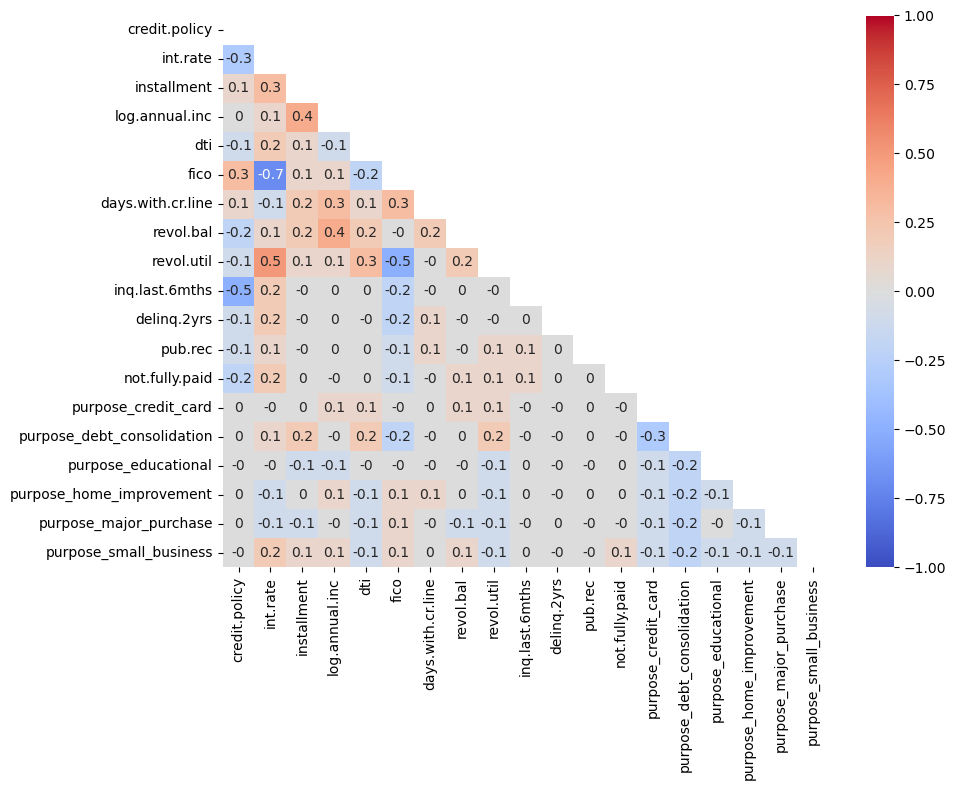

In [135]:
corr_data = final_data.corr()
mask = np.triu(np.ones_like(corr_data, dtype = bool))

plt.figure(figsize=(10, 8))
sns.heatmap(corr_data.round(1), cmap = 'coolwarm', mask = mask, vmin = -1, vmax = 1, annot = True)
plt.tight_layout()

We see that isit unlikely to run into multicollinearity issues as all relationships are below 0.7. 

Note, however, that in models like linear regression or GLM-style models, it would be worth keeping in mind a potential issue caused by including both Interest Rate and FICO in the same model. 

Tree-based algorithms, on the other hand, do not estimate explicit coefficients, so highly correlated variable pairs are easily handled by models like Random Forest. It might only affect how variable importance is interpreted, but it is unlikely to affect the prediction power of the model, which is the main interest of this exercise.

### Train Test Split

In [136]:
from sklearn.model_selection import train_test_split

In [137]:
final_data.columns

Index(['credit.policy', 'int.rate', 'installment', 'log.annual.inc', 'dti',
       'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement',
       'purpose_major_purchase', 'purpose_small_business'],
      dtype='object')

In [138]:
X = final_data.drop('not.fully.paid',axis=1)
y = final_data['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

### Fitting the model

#### Training a decision tree model
Let's start by training a single decision tree first to explore the power and potential of Random Forests

In [139]:
from sklearn.tree import DecisionTreeClassifier

In [140]:
dtree = DecisionTreeClassifier()

In [141]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

#### Predictions and evaluation of the single prediction tree

In [142]:
dtree_pred = dtree.predict(X_test)

In [143]:
from sklearn.metrics import confusion_matrix, classification_report

In [144]:
print('===========================================')
print('Model evaluation for the single tree model:')
print('===========================================')
print('\n')
print('Confusion matrix')
print('----------------')
print('\n')
print(confusion_matrix(y_test,dtree_pred))
print('\n')
print('Classification report')
print('---------------------')
print(classification_report(y_test,dtree_pred))

Model evaluation for the single tree model:


Confusion matrix
----------------


[[1993  438]
 [ 330  113]]


Classification report
---------------------
              precision    recall  f1-score   support

           0       0.86      0.82      0.84      2431
           1       0.21      0.26      0.23       443

    accuracy                           0.73      2874
   macro avg       0.53      0.54      0.53      2874
weighted avg       0.76      0.73      0.74      2874



#### Training the Random Forest model
Let's now fit the full RF model!

In [145]:
from sklearn.ensemble import RandomForestClassifier

In [154]:
rfc = RandomForestClassifier(n_estimators=300)

In [155]:
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=300)

#### Predictions and evaluation of the Random Forest

In [156]:
rfc_pred = rfc.predict(X_test)

In [157]:
print('============================================')
print('Model evaluation for the Random Forest model')
print('============================================')
print('\n')
print('Confusion matrix')
print('----------------')
print('\n')
print(confusion_matrix(y_test,rfc_pred))
print('\n')
print('Classification report')
print('---------------------')
print(classification_report(y_test,rfc_pred))

Model evaluation for the Random Forest model


Confusion matrix
----------------


[[2421   10]
 [ 432   11]]


Classification report
---------------------
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.52      0.02      0.05       443

    accuracy                           0.85      2874
   macro avg       0.69      0.51      0.48      2874
weighted avg       0.80      0.85      0.78      2874



A key issue in this model is that even though the accuracy looks good on the surface (85%) the recall for class 1 (not fully paid, our target) is extremely low (2%). This means that the model identifies very well all the fuly paid loans but misses most of the not fully paid ones. This is problematic because we want to buffer ourselve against the borrowers that are likely to default, so we really want to be able to predict these.
Thus, the model seems to achieve high overall accuracy by exploiting the data imbalance (fully paid is the majority class, 2431 vs 443), but fails to identify the minority class, which is the one we actually care about.
In summary: **this model is not useful for predicting loan default risk**. It just reproduces the dominant pattern.

When compared to the single tree model, the Random Forest model perform noticeably worse (if what we care the most is the recall), with a much greater imbalance of the classes. The single tree model does a better job at identifying the minority cases, which are the main interest of the exercise.

However, it is worth noting that none of the models would satisfy and more feature engineering is needed to achieve an acceptable model.

# End of script!